# Machine Learning Assignment 3
### Lamya Daakir                          
ldaakir3                           
GTID# : 903529703                 
CS 7641

# Importing the necessary libraries

In [2080]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import seaborn as sns
# sns.set()
from pandas import Series, DataFrame
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score,pairwise_distances_argmin
import timeit
from matplotlib.legend_handler import HandlerLine2D
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold, train_test_split,cross_val_score,cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score

    
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score
import matplotlib.pyplot as plt

# Plotting

### https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [2081]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(25, 6))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

In [2149]:
# https://github.com/BlackArbsCEO/Mixture_Models/blob/K-Means,-E-M,-Mixture-Models/E-M%2C%20K-Means%2C%20Mixture%20Models.ipynb

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) 
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# Data Preprocessing of the dataset seismic

In [2083]:
dataset = pd.read_csv('seismic.csv', header = None)

In [2084]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
1,1,a,a,N,43650,334,38,90,a,0,0,0,0,0,0,0,0,0,0,0
2,2,a,a,W,154830,1252,33,11,a,2,2,0,0,0,0,0,0,1100,700,0
3,3,a,b,W,121720,1170,1,2,a,1,0,1,0,0,0,0,0,5000,5000,0
4,4,a,b,W,111950,997,-8,-13,a,4,3,1,0,0,0,0,0,4400,3000,0


In [2085]:
X = dataset.iloc[1:, 1:19].values
Y = dataset.iloc[1:, 19].values
X1 = dataset.iloc[1:,1:10]
X1.head()

,1,2,3,4,5,6,7,8,9
1,a,a,N,43650,334,38,90,a,0
2,a,a,W,154830,1252,33,11,a,2
3,a,b,W,121720,1170,1,2,a,1
4,a,b,W,111950,997,-8,-13,a,4
5,a,b,W,190960,1651,58,45,a,2


In [2086]:
X.shape


(344, 18)

In [2087]:
Y.shape


(344,)

In [2088]:
X[0]

array(['a', 'a', 'N', '43650', '334', '38', '90', 'a', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0'], dtype=object)

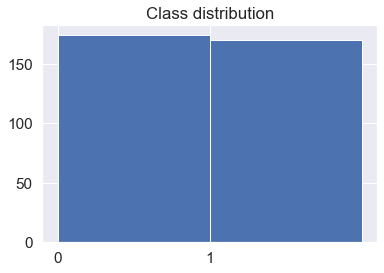

In [2089]:
Y[0]
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(Y,bins=[0,1,2])
plt.title("Class distribution")
plt.show()
# print(np.mean(Y))

In [2090]:
le_Y = LabelEncoder()
Y = le_Y.fit_transform(Y)

In [2091]:
def encoder_X(index):
    le_X = LabelEncoder()
    X[:, index] = le_X.fit_transform(X[:, index])

In [2092]:
to_be_encoded_indices = [0, 1, 2, 7]
for x in to_be_encoded_indices:
    encoder_X(x)
X

array([[0, 0, 0, ..., '0', '0', '0'],
       [0, 0, 1, ..., '0', '1100', '700'],
       [0, 1, 1, ..., '0', '5000', '5000'],
       ...,
       [1, 0, 1, ..., '0', '0', '0'],
       [0, 0, 0, ..., '0', '0', '0'],
       [0, 0, 1, ..., '0', '0', '0']], dtype=object)

In [2093]:
pd.DataFrame(pd.DataFrame(X[:, 7])[0].value_counts())

,0
0,325
1,19


In [2094]:
pd.DataFrame(pd.DataFrame(X[:, 3])[0].value_counts())

,0
21060,3
36100,2
81410,2
60340,1
48820,1
...,...
720,1
40070,1
18820,1
91420,1


In [2095]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0]

array([-0.81353288, -0.72853175, -2.07178852, -0.36638922, -0.52792342,
        0.50770584,  1.62863438, -0.24178821, -1.02468638, -0.7853536 ,
       -0.81958752, -0.3041484 , -0.05399492,  0.        ,  0.        ,
        0.        , -0.47401509, -0.42766315])

In [2096]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.813533,-0.728532,-2.071789,-0.366389,-0.527923,0.507706,1.628634,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
1,-0.813533,-0.728532,0.482675,0.120606,0.688097,0.431292,0.205125,-0.241788,0.032261,0.887474,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.407215,-0.378159
2,-0.813533,1.276388,0.482675,-0.024424,0.579477,-0.057754,0.042953,-0.241788,-0.496212,-0.785354,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.170380,-0.074061
3,-0.813533,1.276388,0.482675,-0.067219,0.350314,-0.195299,-0.227334,-0.241788,1.089209,1.723888,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.206816,-0.215502
4,-0.813533,1.276388,0.482675,0.278864,1.216629,0.813360,0.817774,-0.241788,0.032261,-0.785354,1.029187,-0.304148,-0.053995,0.0,0.0,0.0,0.193982,0.208820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,-0.813533,-0.728532,-2.071789,-0.550491,-0.897498,-1.372067,-1.290462,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
340,-0.813533,-0.728532,0.482675,-0.509798,-0.614025,-0.531518,-0.083181,-0.241788,-0.496212,-0.785354,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.413288,-0.356943
341,1.229207,-0.728532,0.482675,-0.398102,-0.114635,2.249935,2.565628,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
342,-0.813533,-0.728532,-2.071789,-0.517858,-0.712049,-0.241147,0.078991,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663


In [2097]:
X.rename(columns = {0:'seismic', 1:'seismoacoustic', 2:'shift', 3:'genergy',  4:'gpuls', 5:'gdenergy', 6:'gdpuls',
                    7:'ghazard', 8:'nbumps'}, inplace = True) 


In [2098]:
X

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,9,10,11,12,13,14,15,16,17
0,-0.813533,-0.728532,-2.071789,-0.366389,-0.527923,0.507706,1.628634,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
1,-0.813533,-0.728532,0.482675,0.120606,0.688097,0.431292,0.205125,-0.241788,0.032261,0.887474,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.407215,-0.378159
2,-0.813533,1.276388,0.482675,-0.024424,0.579477,-0.057754,0.042953,-0.241788,-0.496212,-0.785354,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.170380,-0.074061
3,-0.813533,1.276388,0.482675,-0.067219,0.350314,-0.195299,-0.227334,-0.241788,1.089209,1.723888,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.206816,-0.215502
4,-0.813533,1.276388,0.482675,0.278864,1.216629,0.813360,0.817774,-0.241788,0.032261,-0.785354,1.029187,-0.304148,-0.053995,0.0,0.0,0.0,0.193982,0.208820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,-0.813533,-0.728532,-2.071789,-0.550491,-0.897498,-1.372067,-1.290462,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
340,-0.813533,-0.728532,0.482675,-0.509798,-0.614025,-0.531518,-0.083181,-0.241788,-0.496212,-0.785354,0.104800,-0.304148,-0.053995,0.0,0.0,0.0,-0.413288,-0.356943
341,1.229207,-0.728532,0.482675,-0.398102,-0.114635,2.249935,2.565628,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663
342,-0.813533,-0.728532,-2.071789,-0.517858,-0.712049,-0.241147,0.078991,-0.241788,-1.024686,-0.785354,-0.819588,-0.304148,-0.053995,0.0,0.0,0.0,-0.474015,-0.427663




# Training and test dataset

In [2099]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [2100]:
pd.DataFrame(pd.DataFrame(Y_train)[0].value_counts())

,0
1,139
0,136


In [2101]:
pd.DataFrame(pd.DataFrame(Y_test)[0].value_counts())

,0
0,38
1,31


# Data Preprocessing of the dataset seismic

# 1. Clustering


## K-means clustering

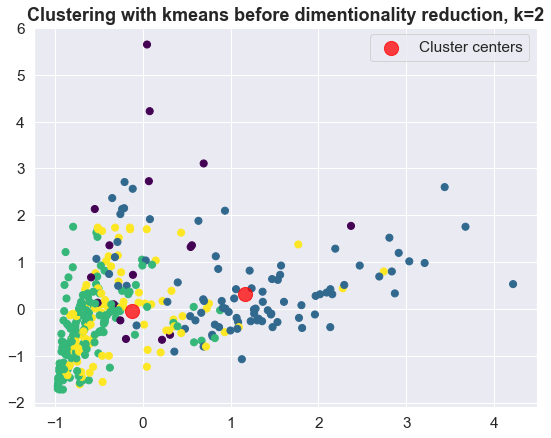

In [2102]:
km = KMeans(n_clusters=2)
cluster = km.fit(X)
k=2
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(X.iloc[:, 4], X.iloc[:,6 ], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 2], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans before dimentionality reduction, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

Score for number of cluster(s) 2: -4268.2203580949445
Silhouette score for number of cluster(s) 2: 0.4111068249795356
Score for number of cluster(s) 3: -3707.89401221787
Silhouette score for number of cluster(s) 3: 0.16357600518107107
Score for number of cluster(s) 4: -3347.2034820008557
Silhouette score for number of cluster(s) 4: 0.17159137257802712
Score for number of cluster(s) 5: -2955.9442491219734
Silhouette score for number of cluster(s) 5: 0.16532401423118728
Score for number of cluster(s) 6: -2697.0207742457787
Silhouette score for number of cluster(s) 6: 0.1823458369892592
Score for number of cluster(s) 7: -2392.685952006635
Silhouette score for number of cluster(s) 7: 0.19580014595346806
Score for number of cluster(s) 8: -2142.7004210644873
Silhouette score for number of cluster(s) 8: 0.21628910850290214
Score for number of cluster(s) 9: -2032.8054323810047
Silhouette score for number of cluster(s) 9: 0.2199917222139646
Score for number of cluster(s) 10: -1920.3379242998694

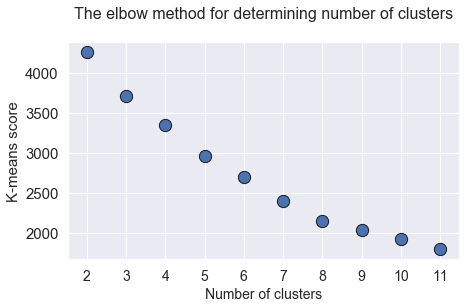

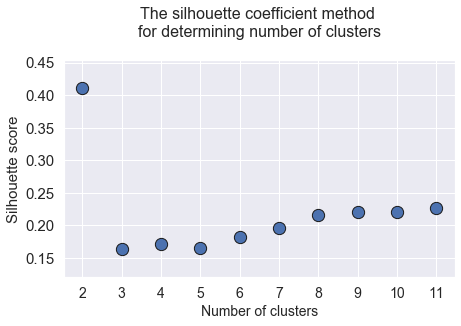

In [2106]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

X_scaled=X
km_scores=[]
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

## Expectation Maximization

In [2107]:
random_seed=12
n_components = np.arange(2, 31)
BIC = np.zeros(n_components.size)
for i, n in enumerate(n_components):
    em = EM(n_components=n, random_state=random_seed)
    em.fit(X)
    BIC[i] = em.bic(X)

# components for seismic dataset:  4


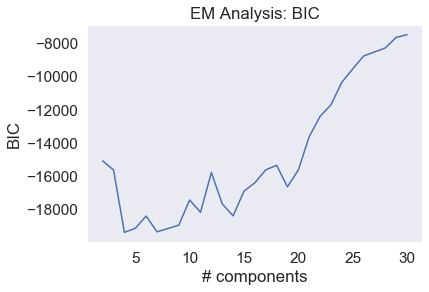

In [2108]:
plt.figure()
plt.plot(n_components,BIC)
plt.xlabel('# components')
plt.ylabel('BIC')
plt.title('EM Analysis: BIC')
plt.grid()
print('# components for seismic dataset: ', n_components[np.argmin(BIC)])

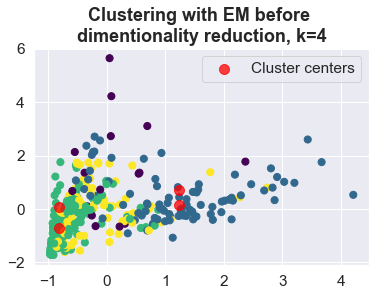

In [2110]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import mixture


em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(X)
plt.title('find_clusters() k-means func', fontsize=18, fontweight='demi')
# plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(X.iloc[:, 4],X.iloc[:, 6], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, X.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(X)
    centers[i, :] = X.iloc[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 6], c='red', s=100, alpha=0.75, label='Cluster centers')
k=4

plt.title('Clustering with EM before \ndimentionality reduction, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

# 2. Dimentionality reduction algorithms:

## PCA

In [2111]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=12)
pca_reduced_data = pca_reducer.fit_transform(X)
pca_reduced_data.shape

(344, 12)

In [2112]:
# https://etav.github.io/python/scikit_pca.html
# Create a Covariance Matrix
covar_matrix_pca = PCA(n_components = 18)
# Calculate Eigenvalues
x_pca=covar_matrix_pca.fit(X)
variance_pca = covar_matrix_pca.explained_variance_ratio_ #calculate variance ratios
var_pca=np.cumsum(np.round(covar_matrix_pca.explained_variance_ratio_, decimals=3)*100)
var_pca #cumulative sum of variance explained with [n] features
eigenvalues=np.round(covar_matrix_pca.singular_values_)
var_pca


array([25.7, 41.2, 54.5, 64.7, 72.3, 78.6, 83.7, 88.5, 92.7, 96.3, 97.9,
       98.9, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9])

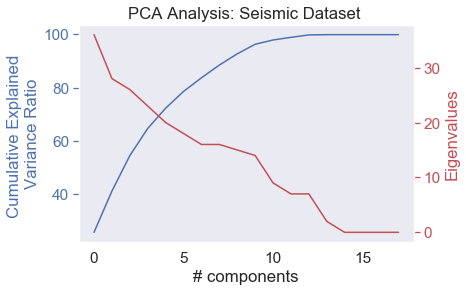

In [2150]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC



cum_var = np.cumsum(pca.explained_variance_ratio_)
fig, ax1 = plt.subplots()
ax1.plot( var_pca, 'b-')
ax1.set_xlabel('# components')
ax1.set_ylabel('Cumulative Explained \nVariance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)
ax2 = ax1.twinx()
ax2.plot( eigenvalues, 'r-')
ax2.set_ylabel('Eigenvalues', color='r')
ax2.tick_params('y', colors='r')
plt.grid(False)
plt.xlabel("# components")
plt.title("PCA Analysis: Seismic Dataset ")
plt.show()


## ICA

In [2131]:
from sklearn.decomposition import FastICA
ica_reducer = FastICA(n_components=4)
ica_reduced_data = ica_reducer.fit_transform(X)
ica_reduced_data.shape

(344, 4)

C:\Users\Lamya\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


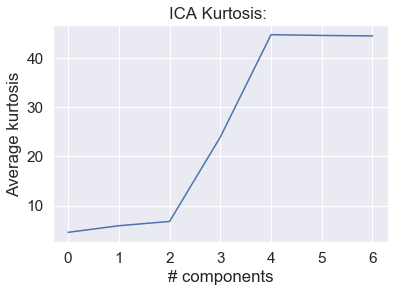

In [2115]:
kurtosis=[]
for i in range(2,9):
    ica_reducer = FastICA(n_components=i)
    ica_reduced_data = ica_reducer.fit_transform(X)
    ica_reduced_data = pd.DataFrame(ica_reduced_data)
    ica_reduced_data = ica_reduced_data.kurt(axis=0)
#     kurtosis.append(ica_reduced_data.mean())
    kurtosis.append(ica_reduced_data.abs().mean())
#     print(ica_reduced_data.abs().mean())
plt.figure()
plt.plot(kurtosis)
plt.title("ICA Kurtosis: ")
plt.xlabel("# components")
plt.ylabel("Average kurtosis")
plt.show()



## Randomized Projections

In [2118]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

(344, 2)

## Truncated SVD

In [2119]:
srp_reducer = TruncatedSVD(n_components=12)
srp_reduced_data = pca_reducer.fit_transform(X)
srp_reduced_data.shape

(344, 12)

In [2120]:
from sklearn.decomposition import TruncatedSVD
covar_matrix_svd=TruncatedSVD(n_components=17)
x_svd=covar_matrix_svd.fit(X)
variance_svd = covar_matrix_svd.explained_variance_ratio_ #calculate variance ratios
var_svd=np.cumsum(np.round(covar_matrix_svd.explained_variance_ratio_, decimals=3)*100)
var_svd #cumulative sum of variance explained with [n] features
eigenvalues_svd=covar_matrix_svd.singular_values_

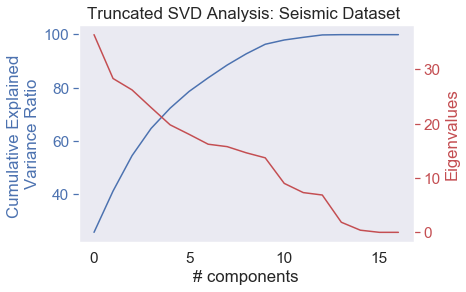

In [2121]:
fig, ax1 = plt.subplots()
ax1.plot(var_svd, 'b-')
ax1.set_xlabel('# components')
ax1.set_ylabel('Cumulative Explained \nVariance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)
ax2 = ax1.twinx()
ax2.plot(eigenvalues_svd, 'r-')
ax2.set_ylabel('Eigenvalues', color='r')
ax2.tick_params('y', colors='r')
plt.grid(False)
plt.title("Truncated SVD Analysis: Seismic Dataset ")
plt.show()

# 3. Clustering after dimentionality reduction:

## PCA

### K-means

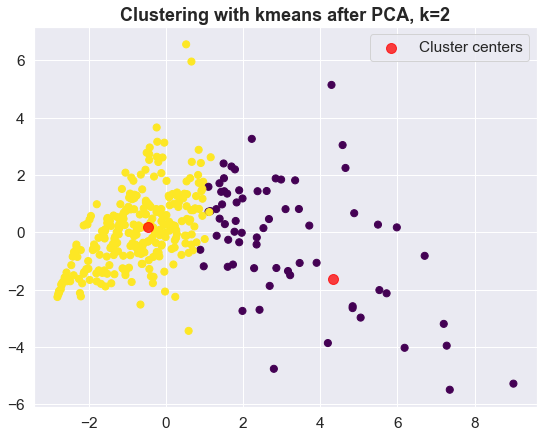

In [1816]:
# K=2
km = KMeans(n_clusters=2)
cluster_pca = km.fit(pca_reduced_data)
k=2
centers, labels = find_clusters(pca_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca.cluster_centers_[:, 0], cluster_pca.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

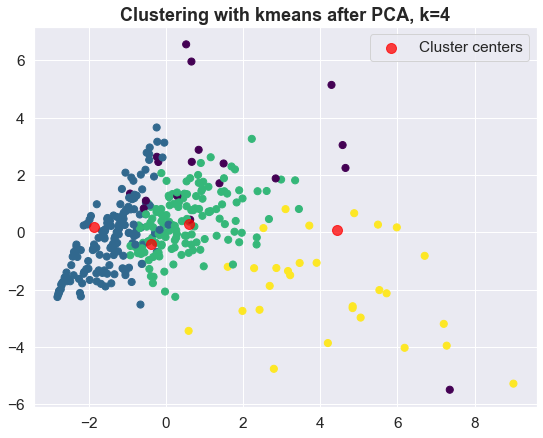

In [1825]:
# k=3
pca_reduced_data_3=pca_reduced_data
# pca_reducer_3 = PCA(n_components=8)
# pca_reduced_data_3 = pca_reducer_3.fit_transform(X)
# pca_reduced_data_3.shape
km = KMeans(n_clusters=4)
cluster_pca_3 = km.fit(pca_reduced_data_3)
k=4
centers, labels = find_clusters(pca_reduced_data_3, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_3[:, 0], pca_reduced_data_3[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca_3.cluster_centers_[:, 0], cluster_pca_3.cluster_centers_[:, 3], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()


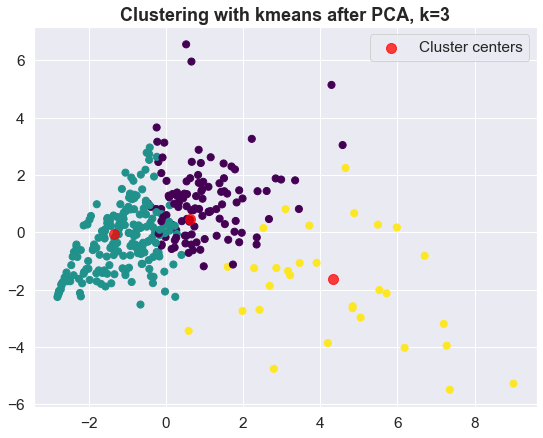

In [1823]:
# k=4
pca_reduced_data_4=pca_reduced_data
pca_reducer_4 = PCA(n_components=4)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
km = KMeans(n_clusters=3)
cluster_pca_4 = km.fit(pca_reduced_data_4)
k=3
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

### Expectation Maximization

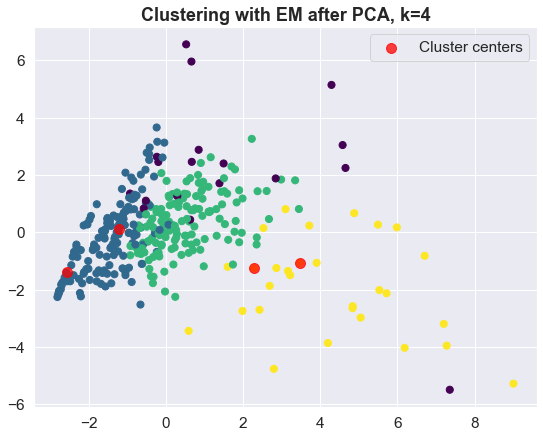

In [2008]:

# k=4
pca_reduced_data_4=pca_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after PCA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()


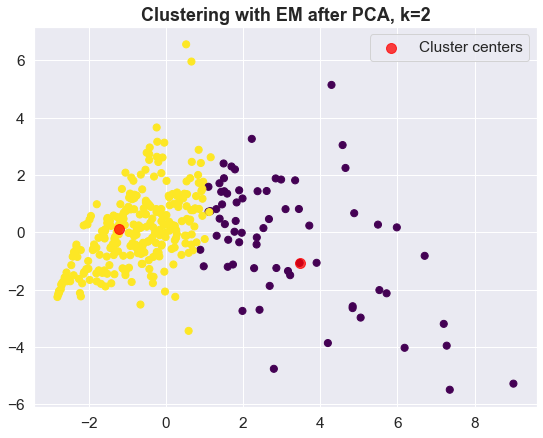

In [2010]:

# k=4
pca_reduced_data_4=pca_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=2,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=2
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after PCA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

## ICA

### K-means

In [2070]:
ica_reducer_3 = FastICA(n_components=4)
ica_reduced_data_3 = ica_reducer_3.fit_transform(X)
ica_reduced_data_3.shape

(344, 4)

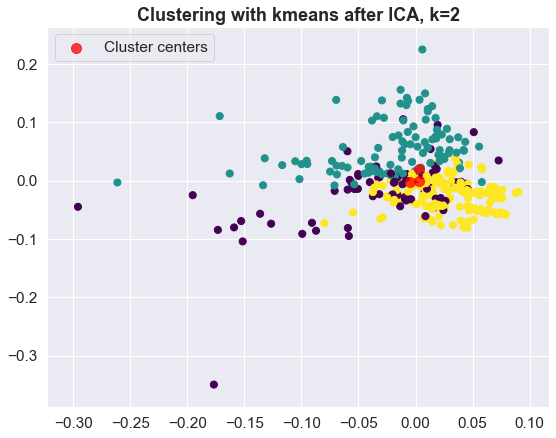

In [2072]:
# # K=2
# from sklearn.decomposition import FastICA
# ica_reducer = FastICA(n_components=2)
# ica_reduced_data = ica_reducer.fit_transform(X)
# # ica_reduced_data.shape

# from sklearn.decomposition import FastICA
# ica_reducer = FastICA(n_components=4)
# ica_reduced_data = ica_reducer.fit_transform(X)

km = KMeans(n_clusters=3)
cluster_ica = km.fit(ica_reduced_data)
k=3
centers, labels = find_clusters(ica_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(ica_reduced_data[:, 0], ica_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_ica.cluster_centers_[:, 0], cluster_ica.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after ICA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

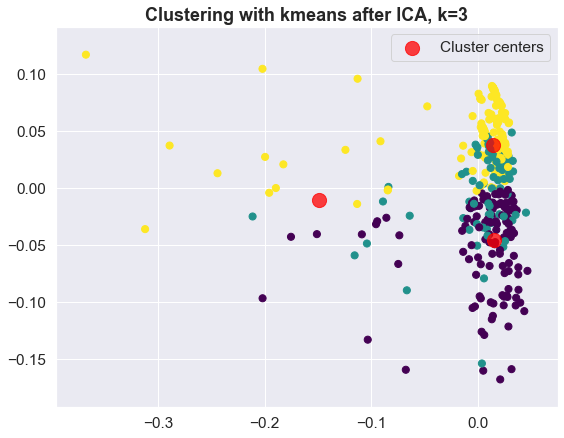

In [1755]:
# k=3


km = KMeans(n_clusters=3)
cluster_ica_3 = km.fit(ica_reduced_data_3)
k=3
centers, labels = find_clusters(ica_reduced_data_3, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(ica_reduced_data_3[:, 0], ica_reduced_data_3[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_ica_3.cluster_centers_[:, 0], cluster_ica_3.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after ICA, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

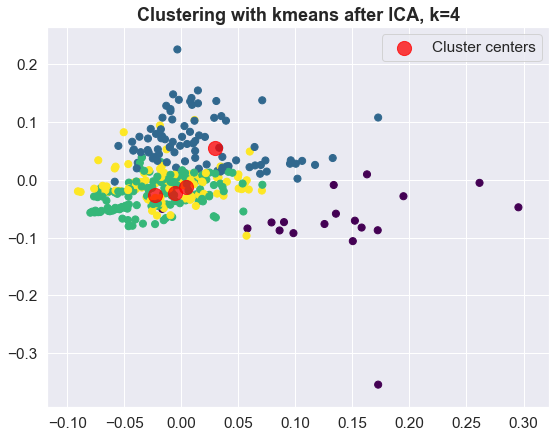

In [1756]:
# k=4
ica_reducer_4 = FastICA(n_components=4)
ica_reduced_data_4 = ica_reducer_4.fit_transform(X)
ica_reduced_data_4.shape

km = KMeans(n_clusters=4)
cluster_ica_4 = km.fit(ica_reduced_data_4)
k=4
centers, labels = find_clusters(ica_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(ica_reduced_data_4[:, 0], ica_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_ica_4.cluster_centers_[:, 0], cluster_ica_4.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after ICA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

### Expectation Maximization

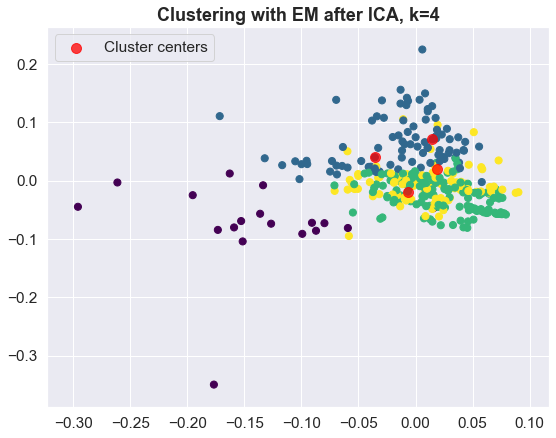

In [2074]:

# k=4
pca_reduced_data_4=ica_reduced_data
pca_reduced_data=ica_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after ICA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

## Randomized Projections

### K-means

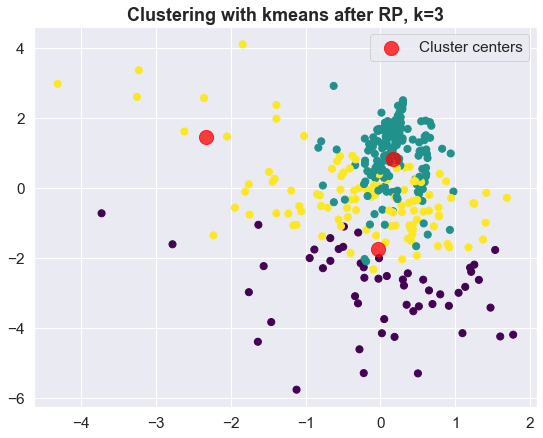

In [1970]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=18)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

km = KMeans(n_clusters=3)
cluster_rp = km.fit(rp_reduced_data)
k=3
centers, labels = find_clusters(rp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(rp_reduced_data[:, 0], rp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_rp.cluster_centers_[:, 0], cluster_rp.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after RP, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

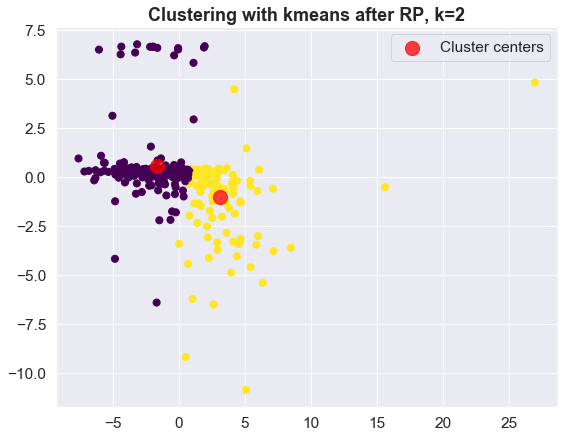

In [1996]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

km = KMeans(n_clusters=2)
cluster_rp = km.fit(rp_reduced_data)
k=2
centers, labels = find_clusters(rp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(rp_reduced_data[:, 0], rp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_rp.cluster_centers_[:, 0], cluster_rp.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after RP, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

### Expectation Maximization

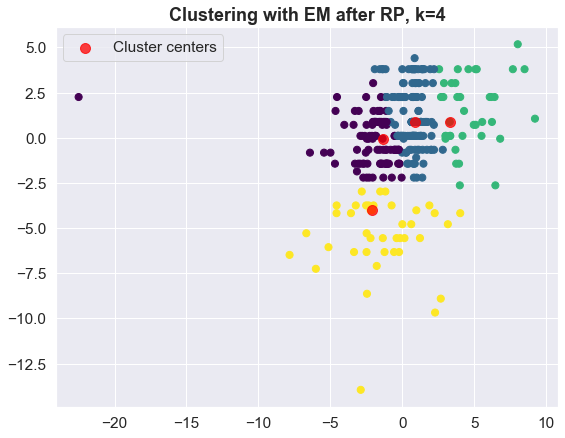

In [2048]:

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

# k=4
pca_reduced_data_4=rp_reduced_data
pca_reduced_data=rp_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(rp_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after RP, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

## SVD

### K-means

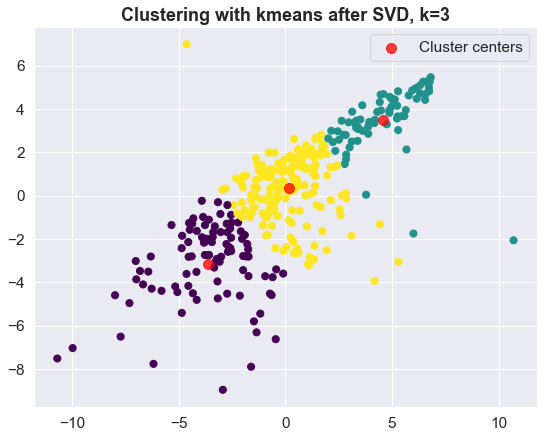

In [1972]:
# srp_reduced_data
km = KMeans(n_clusters=3)
cluster_srp = km.fit(srp_reduced_data)
k=3
centers, labels = find_clusters(srp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(srp_reduced_data[:, 0], srp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_srp.cluster_centers_[:, 0], cluster_srp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after SVD, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

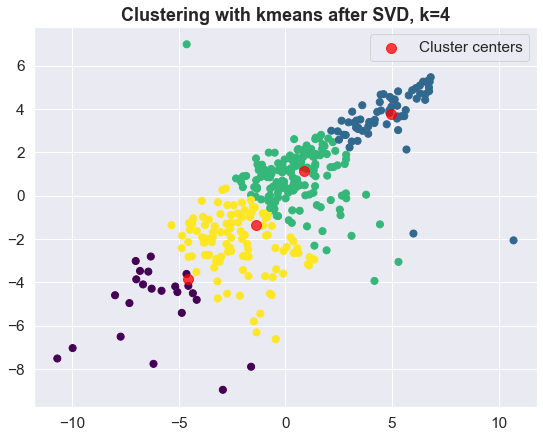

In [1973]:
km = KMeans(n_clusters=4)
cluster_srp = km.fit(srp_reduced_data)
k=4
centers, labels = find_clusters(srp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(srp_reduced_data[:, 0], srp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_srp.cluster_centers_[:, 0], cluster_srp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after SVD, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

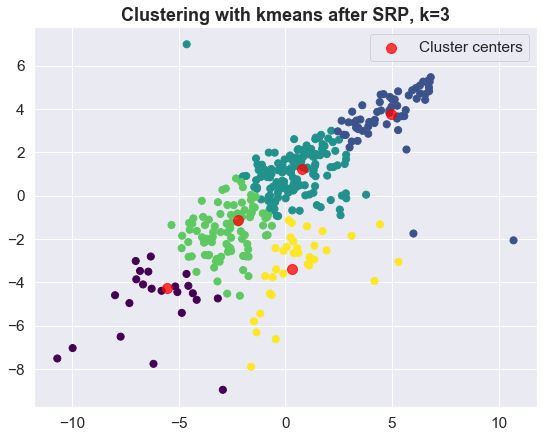

In [1873]:
km = KMeans(n_clusters=5)
cluster_srp = km.fit(srp_reduced_data)
k=5
centers, labels = find_clusters(srp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(srp_reduced_data[:, 0], srp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_srp.cluster_centers_[:, 0], cluster_srp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after SRP, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

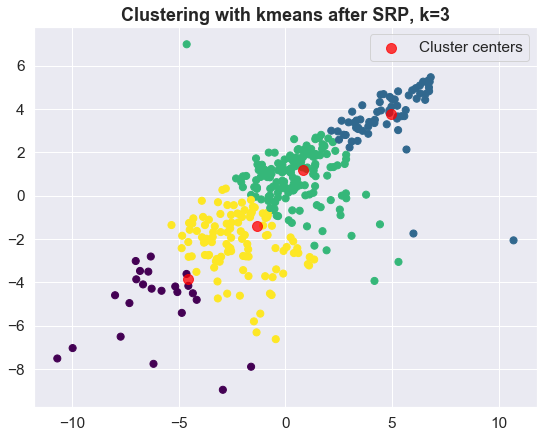

In [1882]:
km = KMeans(n_clusters=4)
cluster_srp = km.fit(srp_reduced_data)
k=4
centers, labels = find_clusters(srp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(srp_reduced_data[:, 0], srp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_srp.cluster_centers_[:, 0], cluster_srp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after SRP, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

### Expectation Maximization

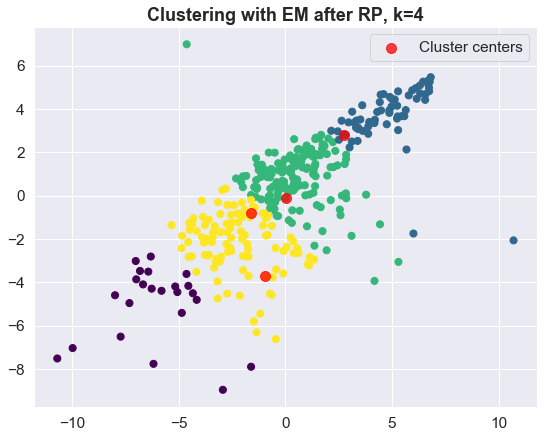

In [2052]:

# k=4
pca_reduced_data_4=srp_reduced_data
pca_reduced_data=srp_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(rp_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after RP, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

# 4.Neural Network on the newly projected data

# 5.Neural Network on the newly projected data

In [2124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Neural Network

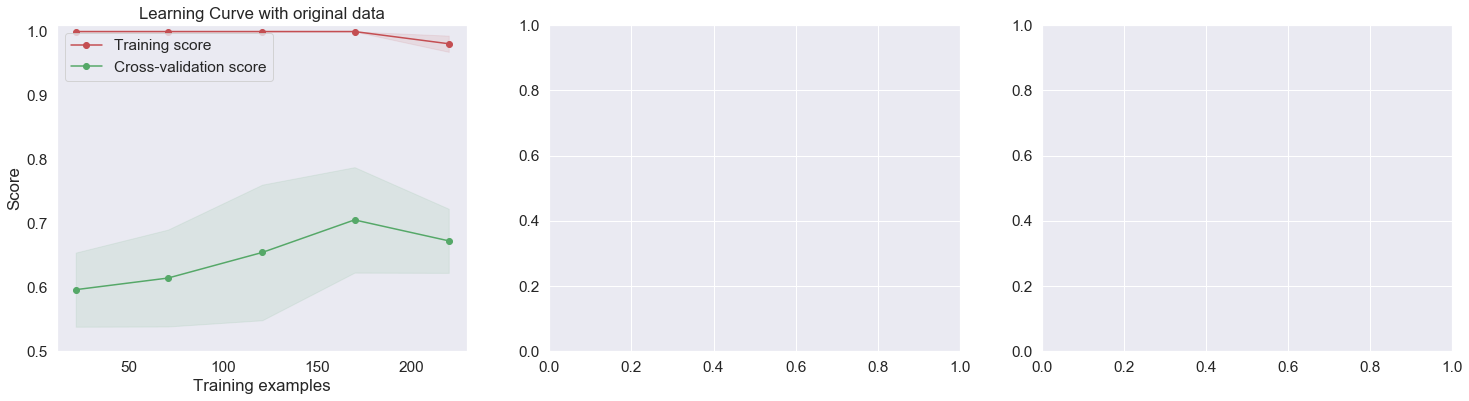

The training accuracy score is 1.0
The test accuracy score is 0.6811594202898551
The elapsed time 6.801763296127319


In [2144]:
# ORIGINAL DATA
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 


from sklearn.neural_network import MLPClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with original data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

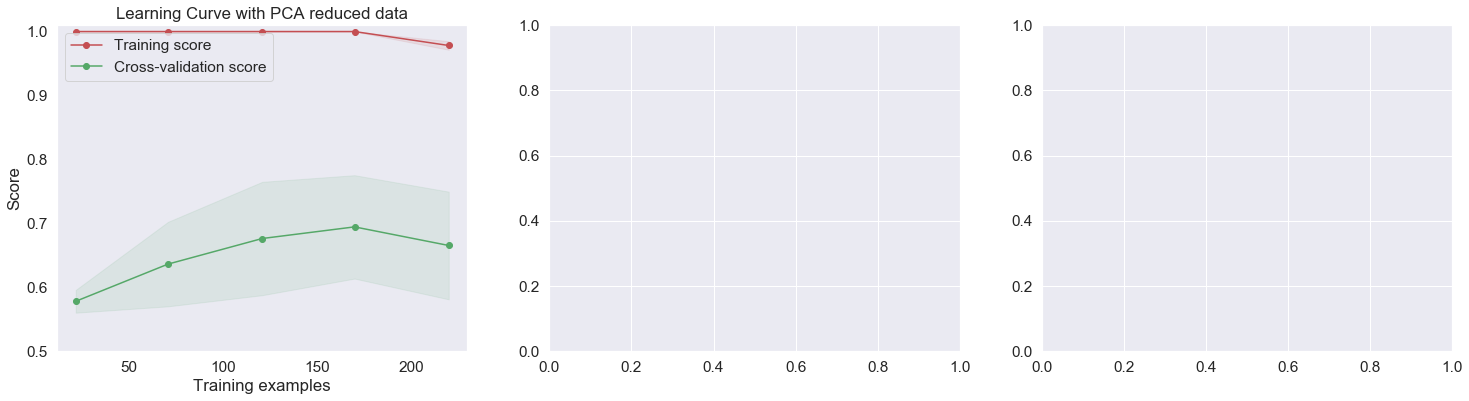

The training accuracy score is 0.9963636363636363
The test accuracy score is 0.6666666666666666
The elapsed time 6.311108350753784


In [2145]:
# PCA REDUCED DATA
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(pca_reduced_data, Y, test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

C:\Users\Lamya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


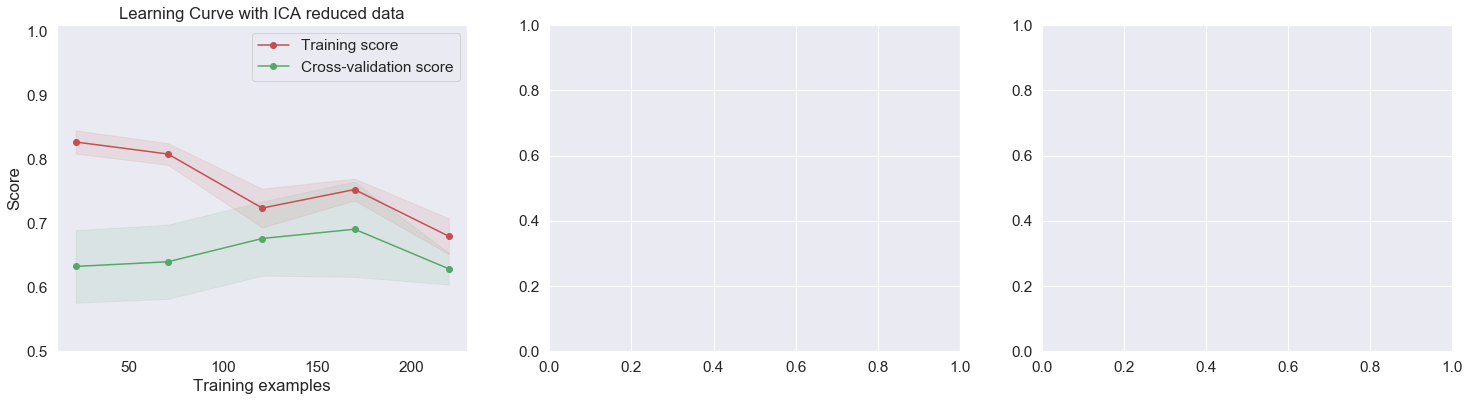

The training accuracy score is 0.7127272727272728
The test accuracy score is 0.6956521739130435
The elapsed time 9.265202522277832


In [2146]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(ica_reduced_data, Y, test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with ICA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()

score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")
elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

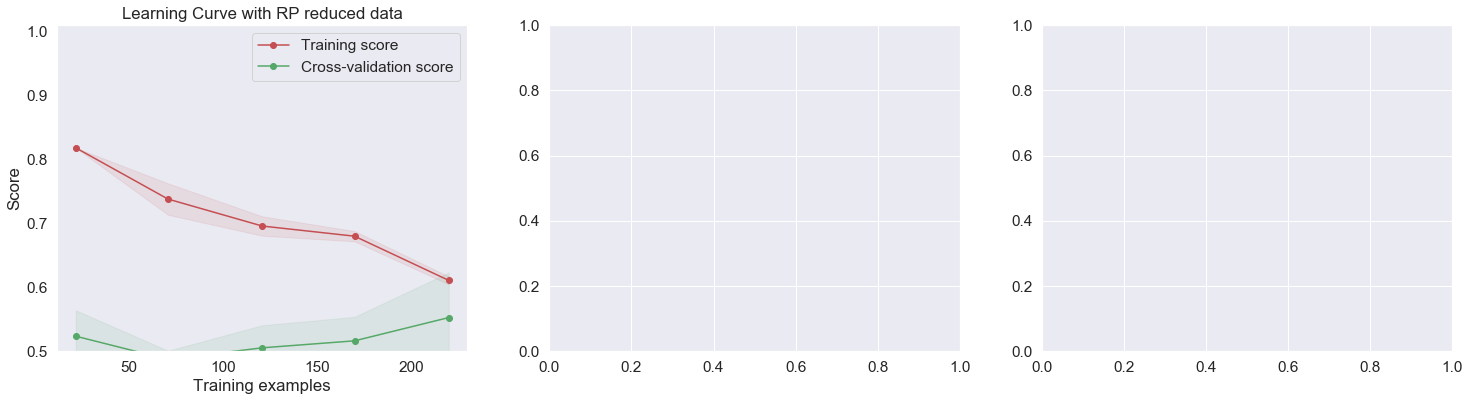

The training accuracy score is 0.6327272727272727
The test accuracy score is 0.5507246376811594
The elapsed time 5.488275766372681


In [2147]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(rp_reduced_data, Y, test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with RP reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")
elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

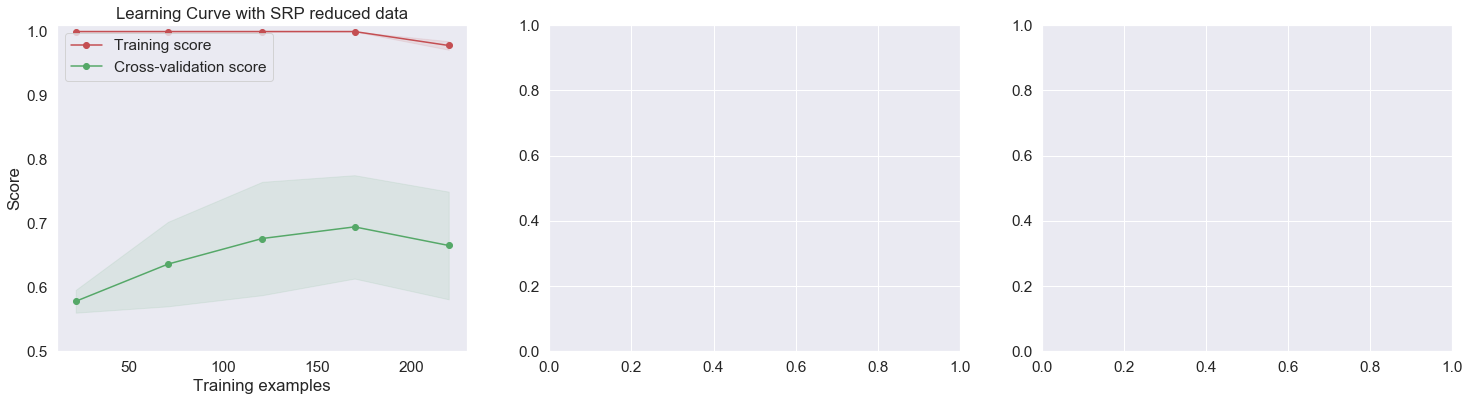

The training accuracy score is 0.9963636363636363
The test accuracy score is 0.6666666666666666
The elapsed time 6.19995379447937


In [2148]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(srp_reduced_data, Y, test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with SRP reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")
elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

In [1905]:

X_train, X_test, Y_train, Y_test = train_test_split(pca_reduced_data, Y, test_size = 0.2, random_state = 1)


# Last part

In [ ]:
# Definining the labels for k-means
km = KMeans(n_clusters=2).fit(X)
km_labels = km.labels_
# Definining the labels for EM
em = EM(n_components=4,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X)
em_labels = em.predict(X)


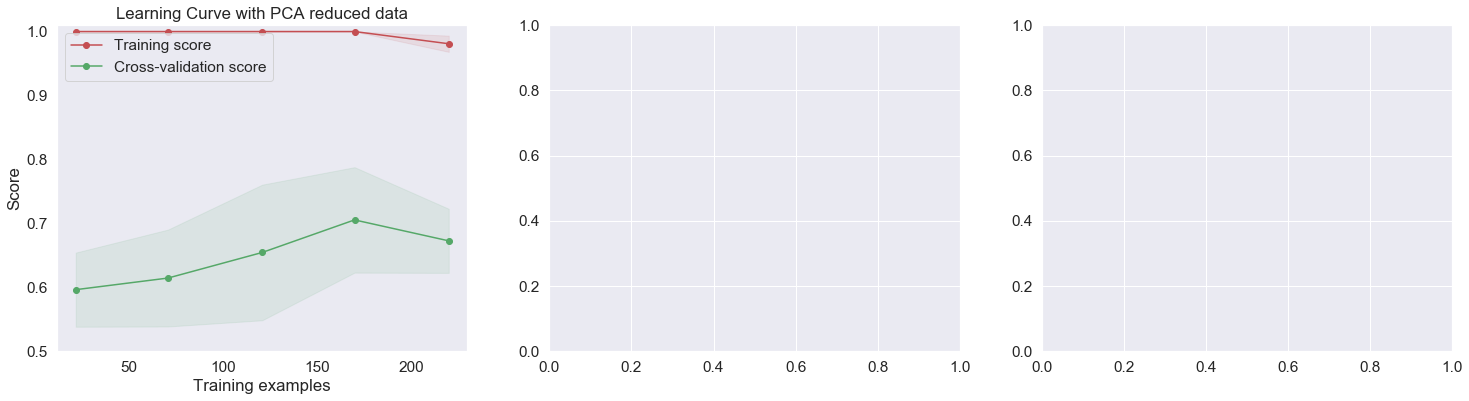

The training accuracy score is 1.0
The test accuracy score is 0.6811594202898551
The elapsed time 7.600754022598267


In [2165]:

# Original data
cluster_original = pd.DataFrame(X)
cluster_original['KM'] = km_labels
cluster_original['EM'] = em_labels

import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(np.array(cluster_original),np.array(Y), test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

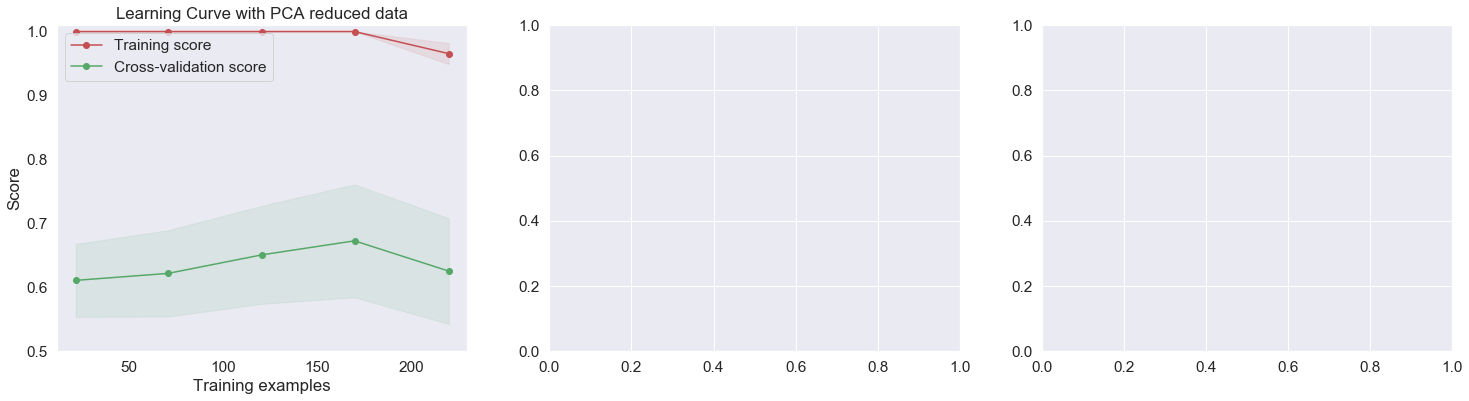

The training accuracy score is 1.0
The test accuracy score is 0.6811594202898551
The elapsed time 6.448744535446167


In [2166]:
# Original data
cluster_pca = pd.DataFrame(pca_reduced_data)
cluster_pca['KM'] = km_labels
cluster_pca['EM'] = em_labels

import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(np.array(cluster_pca),np.array(Y), test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

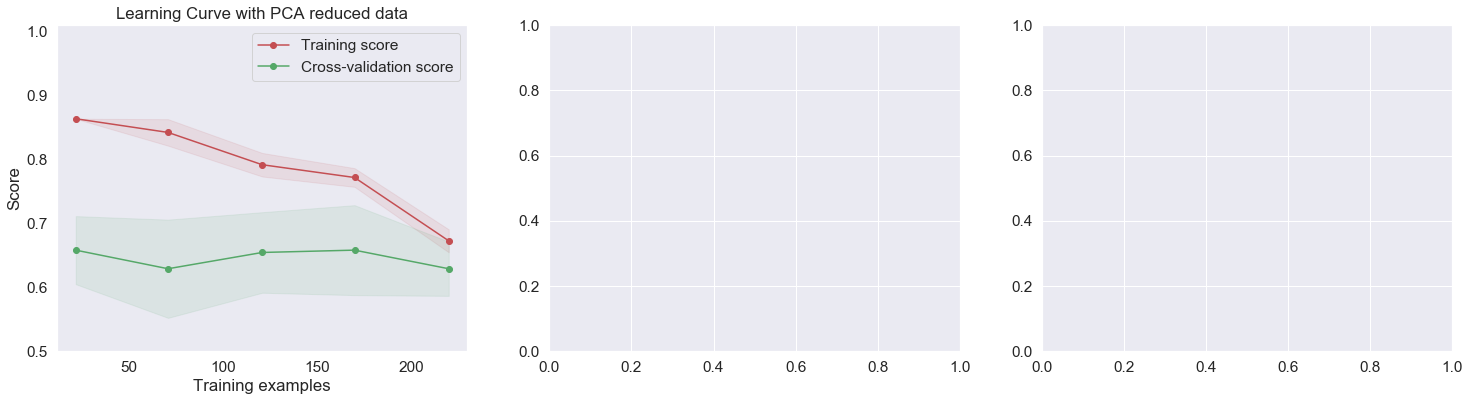

The training accuracy score is 0.7127272727272728
The test accuracy score is 0.6086956521739131
The elapsed time 7.008242845535278


In [2168]:
cluster_ica = pd.DataFrame(ica_reduced_data)
cluster_ica['KM'] = km_labels
cluster_ica['EM'] = em_labels


import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(np.array(cluster_ica),np.array(Y), test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

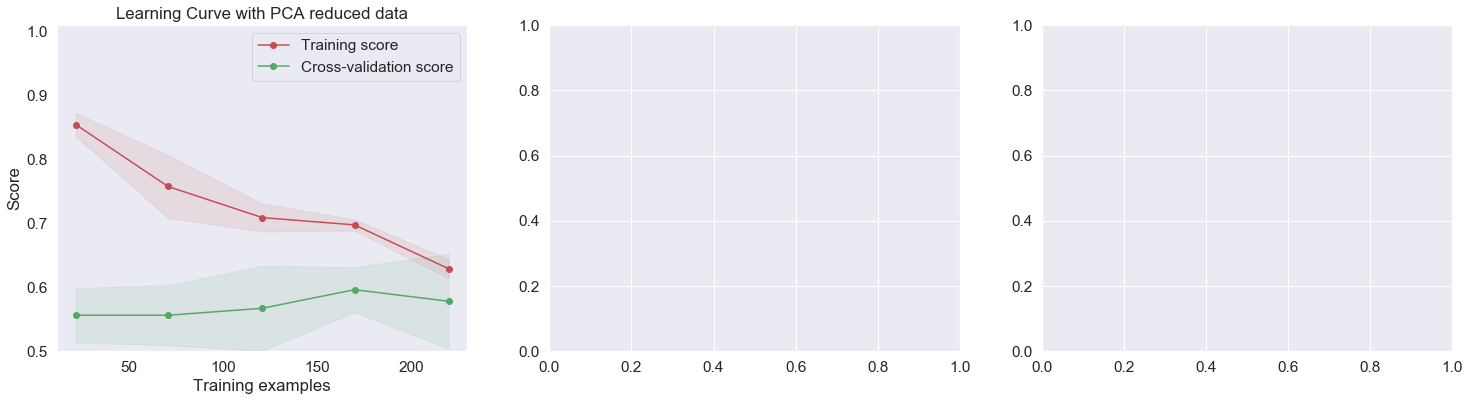

The training accuracy score is 0.6545454545454545
The test accuracy score is 0.4927536231884058
The elapsed time 5.6518378257751465


In [2170]:
cluster_rp = pd.DataFrame(rp_reduced_data)
cluster_rp['KM'] = km_labels
cluster_rp['EM'] = em_labels  

import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(np.array(cluster_rp),np.array(Y), test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

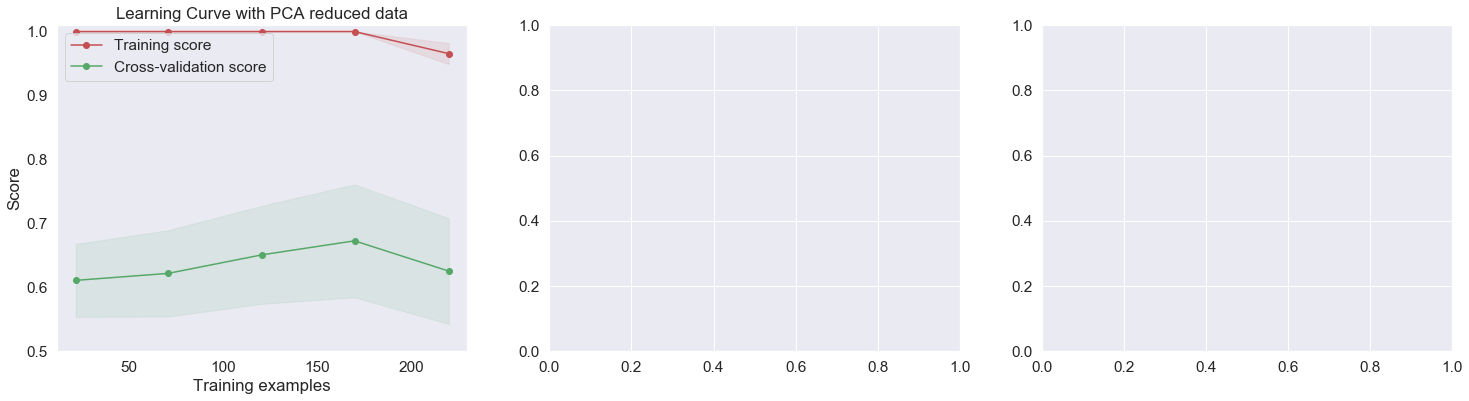

The training accuracy score is 1.0
The test accuracy score is 0.6811594202898551
The elapsed time 6.273211240768433


In [2171]:
cluster_svd = pd.DataFrame(srp_reduced_data)
cluster_svd['KM'] = km_labels
cluster_svd['EM'] = em_labels  

import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

X_train, X_test, Y_train, Y_test = train_test_split(np.array(cluster_svd),np.array(Y), test_size = 0.2, random_state = 1)
classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=400,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
title = "Learning Curve with PCA reduced data"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.5, 1.01), cv=None, n_jobs=4)
plt.show()
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)
print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


elapsed_time_fl = (time.time() - start) 
print(f"The elapsed time {elapsed_time_fl}")

#### Sikora M., Wrobel L.: Application of rule induction algorithms for analysis of data collected by seismic hazard monitoring systems in coal mines. Archives of Mining Sciences, 55(1), 2010, 91-114.